In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
raw_data= pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
raw_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
np.log(raw_data)

C:\Users\ppragallapati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\ppragallapati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.000000,3.218876,0.000000,3.891820,11.419790,1.386294,0.470004,0.000000,-inf,-inf,0.000000,-inf,-inf,-inf
1,0.693147,3.806662,2.944439,3.526361,11.408553,1.098612,0.405465,0.000000,-inf,-inf,0.000000,-inf,-inf,-inf
2,1.098612,3.663562,2.708050,2.397895,11.458680,0.000000,0.000000,0.000000,-inf,-inf,-inf,-inf,-inf,-inf
3,1.386294,3.555348,2.197225,4.605170,11.452241,0.000000,0.993252,0.693147,-inf,-inf,-inf,-inf,-inf,-inf
4,1.609438,3.555348,2.079442,3.806662,11.422235,1.386294,0.000000,0.693147,-inf,-inf,-inf,-inf,-inf,0.000000
5,1.791759,3.610918,2.564949,3.367296,11.430858,1.386294,-0.916291,0.693147,5.043425,-inf,-inf,-inf,0.000000,-inf
6,1.945910,3.970292,3.295837,4.276666,11.426398,0.693147,0.405465,0.693147,-inf,-inf,-inf,-inf,0.000000,-inf
7,2.079442,3.912023,3.178054,3.091042,11.450443,0.000000,-1.203973,1.098612,-inf,-inf,-inf,-inf,-inf,0.000000
8,2.197225,3.555348,2.302585,4.394449,11.408553,1.098612,-0.510826,0.693147,4.644391,-inf,-inf,-inf,0.000000,-inf
9,2.302585,3.526361,2.197225,5.192957,11.440602,0.000000,2.186051,1.098612,-inf,0.000000,-inf,-inf,-inf,-inf


In [5]:
raw_data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


# Checking Outliers

In [6]:
raw_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


C:\Users\ppragallapati\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


-1
-1
-2
-2
-1
-1
-1
-1
-1
-2
-1
-1
-1
-2
-2
-1
-1
-1
-1
-1
-1
-1
-2
-1
-3
-2
-1
-2
-2
-1
-1
-2
-1
-1
-1
-1
-1
-1
-3
-2
-1
-2
-1
-1
-1
-2
-3
-2
-2
-3
-1
-1
52


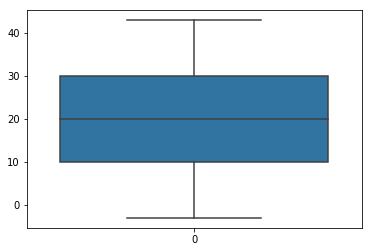

In [7]:
sns.boxplot(data=raw_data['Experience'])
Experience= raw_data['Experience']
count=0
for i in range(5000):
    if Experience[i]< 0:
        count+=1
        print(Experience[i])
        Experience[i]=abs(Experience[i])
        #print(Experience[i])
print(count)
#Experience can not be negative. These are outliers. Converted these negative numbers to positive

In [8]:
#After checking the distributions of all attributes, only experience has wrong values. It has negative values which is not possible. Hence I changed them to positive

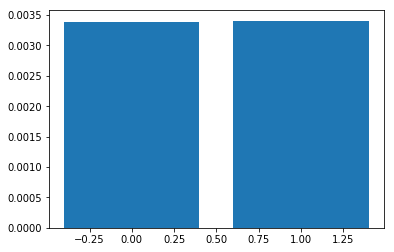

In [9]:
from scipy.stats import norm
plt.bar(raw_data['Personal Loan'], norm.pdf(raw_data['Personal Loan'], 56, 101))
plt.show()

In [ ]:
#There are no outlier/ false data in the target variable

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
final_data = TfidfVectorizer(raw_data)
final_data= raw_data.drop(['ZIP Code', 'ID'], axis= 1)
final_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# SPLIT DATA 70:30

In [11]:
x_train, x_test, y_train, y_test= train_test_split(final_data.drop(['Personal Loan'], axis= 1), final_data['Personal Loan'], test_size=0.3)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logistic= LogisticRegression()
logistic.fit(x_train, y_train)
logistic_prediction= logistic.predict(x_test)

C:\Users\ppragallapati\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_test,logistic_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, logistic_prediction))
metrics.confusion_matrix(y_test, logistic_prediction)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1355
           1       0.83      0.62      0.71       145

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy: 0.9513333333333334


array([[1337,   18],
       [  55,   90]], dtype=int64)

# K- NN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
knn_prediction= knn.predict(x_test)

In [15]:
print(classification_report(y_test,knn_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, knn_prediction))
metrics.confusion_matrix(y_test, knn_prediction)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1355
           1       0.53      0.30      0.38       145

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.73      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500

Accuracy: 0.9066666666666666


array([[1317,   38],
       [ 102,   43]], dtype=int64)

# Naive Bayes

In [16]:
from sklearn.naive_bayes import BernoulliNB
nb= BernoulliNB()
nb.fit(x_train, y_train)
nb_prediction= nb.predict(x_test)

In [17]:
print(classification_report(y_test,nb_prediction))
print("Accuracy:",metrics.accuracy_score(y_test, nb_prediction))
metrics.confusion_matrix(y_test, nb_prediction)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1355
           1       0.39      0.06      0.11       145

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.65      0.53      0.53      1500
weighted avg       0.86      0.90      0.87      1500

Accuracy: 0.9


array([[1341,   14],
       [ 136,    9]], dtype=int64)

# Confusion Matrices

In [18]:
metrics.confusion_matrix(y_test, logistic_prediction)

array([[1337,   18],
       [  55,   90]], dtype=int64)

In [19]:
metrics.confusion_matrix(y_test, knn_prediction)

array([[1317,   38],
       [ 102,   43]], dtype=int64)

In [20]:
metrics.confusion_matrix(y_test, nb_prediction)

array([[1341,   14],
       [ 136,    9]], dtype=int64)

# Conclusion

In [ ]:
#Logistic regression fetches the best results with an accuracy of 95.1%. This is because, Logitic regression works well with Yes/No scenarios. 